In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [3]:
data = pd.read_csv('Superstore.csv', encoding='latin-1')

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
data.shape

(9994, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
def clean_and_separate(dataframe):
    dataframe.drop(['Row ID', 'Country', 'Customer Name'], axis = 1, inplace = True)
    dataframe['Ship Date'] = pd.to_datetime(dataframe['Ship Date'], format = '%d-%m-%Y')
    dataframe['Order Date'] = pd.to_datetime(dataframe['Order Date'], format = '%d-%m-%Y')
    dataframe['Ship Year'] = dataframe['Ship Date'].dt.year
    dataframe['Ship Month'] = dataframe['Ship Date'].dt.month
    dataframe['Ship Day'] = dataframe['Ship Date'].dt.day
    dataframe['Order Year'] = dataframe['Order Date'].dt.year
    dataframe['Order Month'] = dataframe['Order Date'].dt.month
    dataframe['Order Day'] = dataframe['Order Date'].dt.day
    dataframe['Price per Piece'] = dataframe['Sales'] / dataframe['Quantity']
    dataframe['Profit per Piece'] = dataframe['Profit'] / dataframe['Quantity']
    dataframe['Delivery Time'] = (dataframe['Ship Date'] - dataframe['Order Date']).dt.days
    return dataframe
df = clean_and_separate(data)
#df.reindex()
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,...,Profit,Ship Year,Ship Month,Ship Day,Order Year,Order Month,Order Day,Price per Piece,Profit per Piece,Delivery Time
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,...,41.9136,2013,11,12,2013,11,9,130.9800,20.9568,3
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,...,219.5820,2013,11,12,2013,11,9,243.9800,73.1940,3
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,...,6.8714,2013,6,17,2013,6,13,7.3100,3.4357,4
3,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,...,-383.0310,2012,10,18,2012,10,11,191.5155,-76.6062,7
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,...,2.5164,2012,10,18,2012,10,11,11.1840,1.2582,7


In [8]:
df.select_dtypes(exclude=['object']).nunique()

Order Date          1238
Ship Date           1334
Postal Code          631
Sales               5825
Quantity              14
Discount              12
Profit              7287
Ship Year              5
Ship Month            12
Ship Day              31
Order Year             4
Order Month           12
Order Day             31
Price per Piece     3298
Profit per Piece    4246
Delivery Time          8
dtype: int64

<Axes: title={'center': 'Segment Distribution'}>

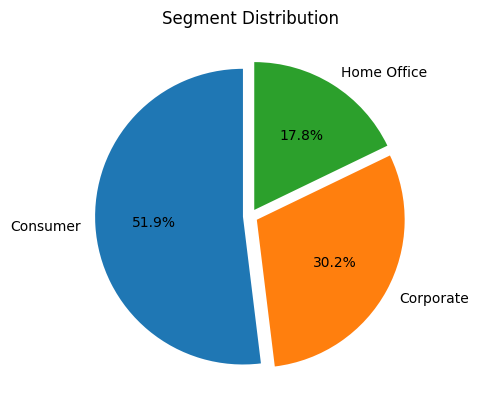

In [9]:
df['Segment'].value_counts().plot(
    kind = 'pie',
    autopct='%1.1f%%',
    startangle=90,
    ylabel='',
    explode = (0.05, 0.05, 0.05),
    title = 'Segment Distribution',
)

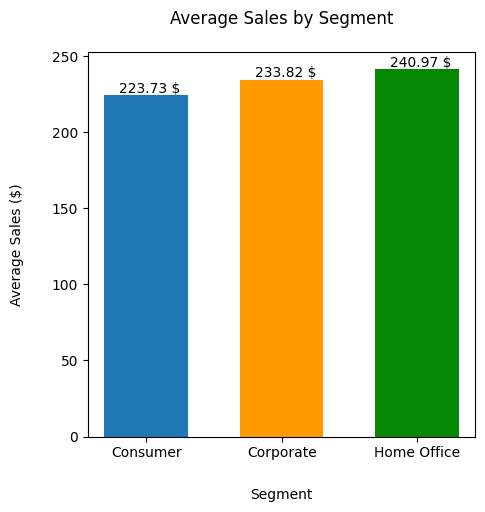

In [10]:
# Create the grouped data first
sales_by_segment = df.groupby('Segment').agg({'Sales':'mean'})

# Create the plot
fig, ax = plt.subplots(figsize=(5, 5))
bars = ax.bar(sales_by_segment.index, sales_by_segment['Sales'], width=0.6, edgecolor='black', linewidth=1.5)

# Set individual colors for each bar
colors = ['#1f77b4', "#ff9900", "#068706"]  # Dark blue, Orange, Green
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Customize the plot
ax.set_title('Average Sales by Segment', pad=20)
ax.set_ylabel('Average Sales ($)', labelpad=20)
ax.set_xlabel('Segment', labelpad=20)

for i, x in enumerate(sales_by_segment['Sales']):
    ax.text(i-0.2, x+5, f'{x:,.2f} $', va='center', fontsize=10)

plt.show()

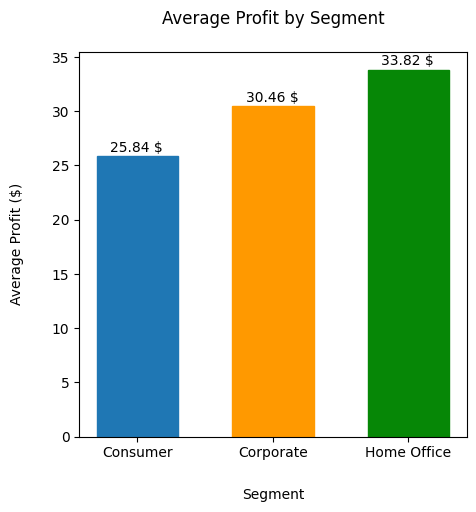

In [11]:
# Create the grouped data first
sales_by_segment = df.groupby('Segment').agg({'Profit':'mean'})

# Create the plot
fig, ax = plt.subplots(figsize=(5, 5))
bars = ax.bar(sales_by_segment.index, sales_by_segment['Profit'], width=0.6)

# Set individual colors for each bar
colors = ['#1f77b4', "#ff9900", "#068706"]  # Dark blue, Orange, Green
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Customize the plot
ax.set_title('Average Profit by Segment', pad=20)
ax.set_ylabel('Average Profit ($)', labelpad=20)
ax.set_xlabel('Segment', labelpad=20)

for i, x in enumerate(sales_by_segment['Profit']):
    ax.text(i-0.2, x+0.8, f'{x:,.2f} $', va='center', fontsize=10)

plt.show()

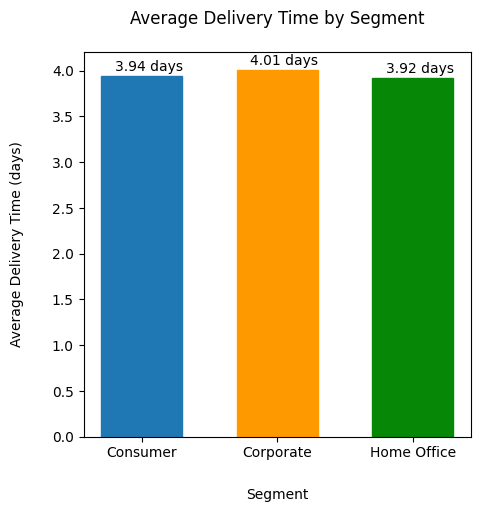

In [12]:
# Create the grouped data first
sales_by_segment = df.groupby('Segment').agg({'Delivery Time':'mean'})

# Create the plot
fig, ax = plt.subplots(figsize=(5, 5))
bars = ax.bar(sales_by_segment.index, sales_by_segment['Delivery Time'], width=0.6)

# Set individual colors for each bar
colors = ['#1f77b4', "#ff9900", "#068706"]  # Dark blue, Orange, Green
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Customize the plot
ax.set_title('Average Delivery Time by Segment', pad=20)
ax.set_ylabel('Average Delivery Time (days)', labelpad=20)
ax.set_xlabel('Segment', labelpad=20)

for i, x in enumerate(sales_by_segment['Delivery Time']):
    ax.text(i-0.2, x+0.1, f'{x:,.2f} days', va='center', fontsize=10)

plt.show()

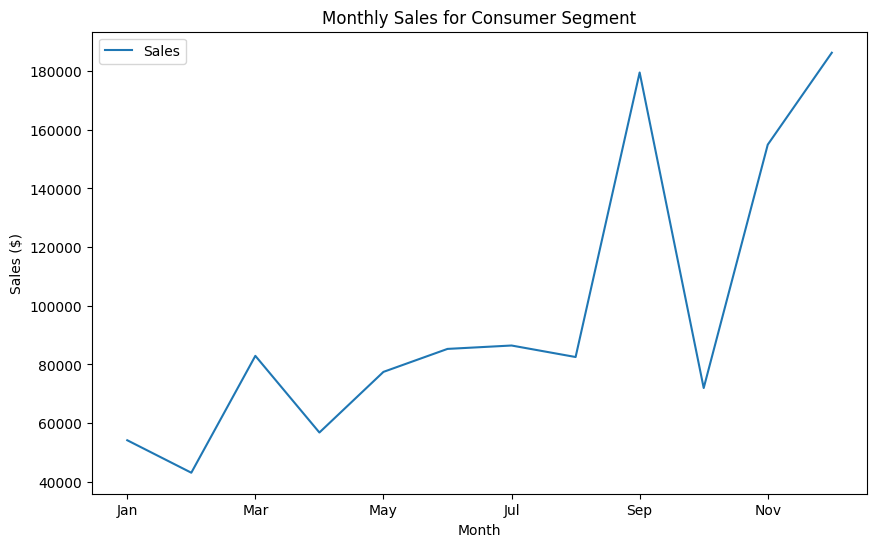

In [13]:
# Create figure and axes first
fig, ax = plt.subplots(figsize=(10, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_sales = df.query("(Segment == 'Consumer')").groupby('Ship Month').agg({'Sales':'sum'})
monthly_sales.index = month_names
monthly_sales.plot(kind='line', ax=ax)

# Customize the plot
ax.set_title('Monthly Sales for Consumer Segment')
ax.set_ylabel('Sales ($)')
ax.set_xlabel('Month')

plt.show()

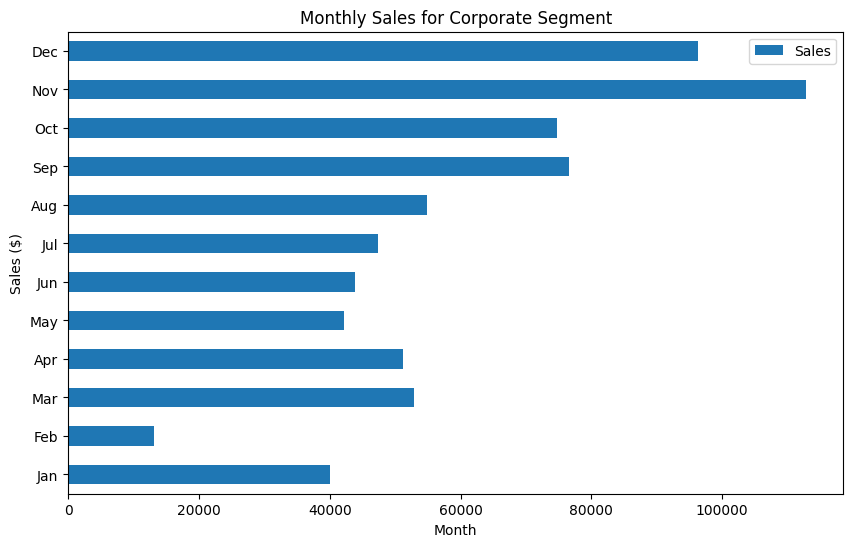

In [14]:
# Create figure and axes first
fig, ax = plt.subplots(figsize=(10, 6))

monthly_sales = df.query("(Segment == 'Corporate')").groupby('Ship Month').agg({'Sales':'sum'})
monthly_sales.index = month_names
monthly_sales.plot(kind='barh', ax=ax)

# Customize the plot
ax.set_title('Monthly Sales for Corporate Segment')
ax.set_ylabel('Sales ($)')
ax.set_xlabel('Month')

plt.show()

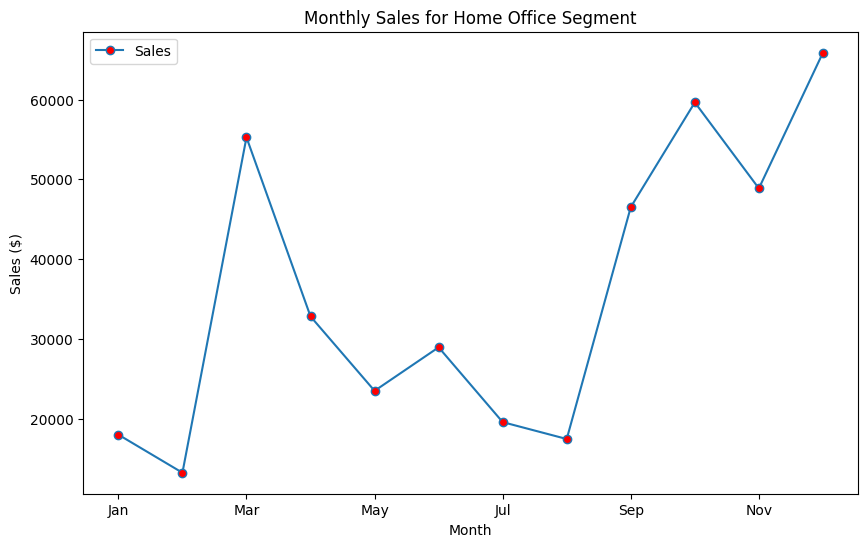

In [15]:
# Create figure and axes first
fig, ax = plt.subplots(figsize=(10, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_sales = df.query("(Segment == 'Home Office')").groupby('Ship Month').agg({'Sales':'sum'})
monthly_sales.index = month_names
monthly_sales.plot(kind='line',
                    markerfacecolor='red',
                    marker = 'o',
                    ax=ax)

# Customize the plot
ax.set_title('Monthly Sales for Home Office Segment')
ax.set_ylabel('Sales ($)')
ax.set_xlabel('Month')

plt.show()

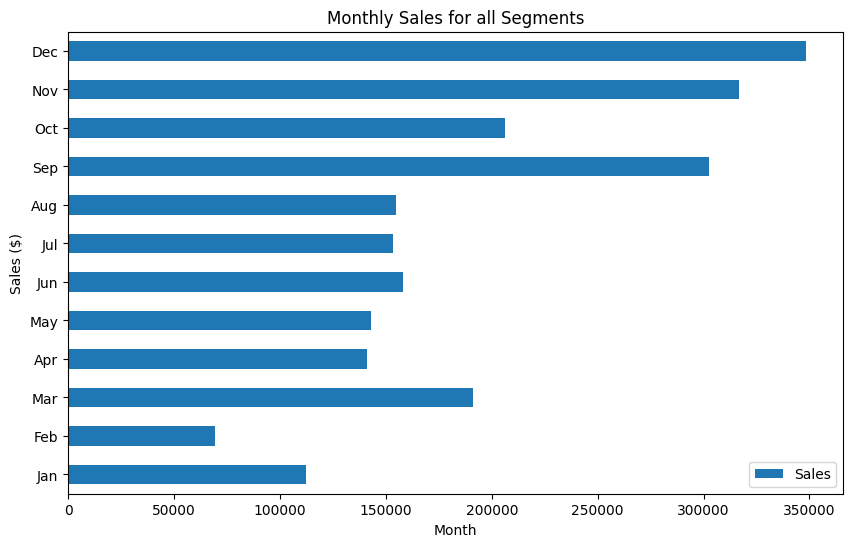

In [16]:
# Create figure and axes first
fig, ax = plt.subplots(figsize=(10, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_sales = df.groupby('Ship Month').agg({'Sales':'sum'})
monthly_sales.index = month_names
monthly_sales.plot(kind='barh', ax=ax)

# Customize the plot
ax.set_title('Monthly Sales for all Segments')
ax.set_ylabel('Sales ($)')
ax.set_xlabel('Month')

plt.show()

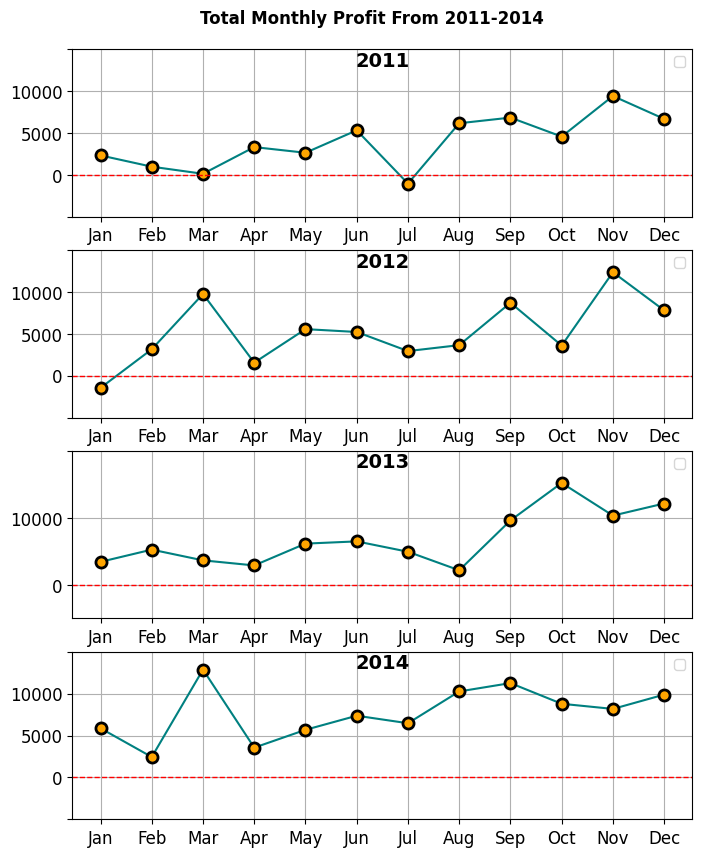

In [58]:
fontdict_title = {'fontsize': 18, 'fontweight': 'bold'}
fontdict_labels = {'fontsize': 14, 'fontweight': 'bold'}
fig, ax = plt.subplots(4, 1, figsize=(8, 10))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = [2011,2012,2013,2014]
years.sort()
fig.suptitle('Total Monthly Profit From 2011-2014', fontweight = 'bold', y=0.92)
for i, year in enumerate(years):
    df_year = df[df['Ship Year'] == year]
    monthly_sales = df_year.groupby('Ship Month').agg({'Profit':'sum'})
   # monthly_sales.index = month_names
    monthly_sales.plot(
                kind='line', 
                ax=ax[i], 
                color="#008080",  # Teal color for the line
                lw = 1.5,        # Slightly thicker line
                marker='o', 
                markerfacecolor='#FFA500',  # Orange color for markers
                markeredgewidth=2, 
                markersize=8, 
                markeredgecolor='black',
                grid = 'True')
    ax[i].set_title(f'{year}', fontdict=fontdict_labels, pad = 0, y =0.90)
    #ax[i].set_ylabel('Profit ($)', rotation=0, labelpad=40, fontdict=fontdict_labels,)
    ax[i].set_xlabel('')
    ax[i].set_xticks(range(1,len(month_names)+1))
    ax[i].set_xticklabels(month_names, fontsize=12)
    ax[i].set_yticks(range(-5000, 16000, 5000))
    ax[i].set_yticklabels(['', 0, 5000, 10000, ''], fontsize=12)
    ax[i].axhline(0, color='red', lw=1, ls='--')
    ax[i].legend('')
ax[2].set_yticks(range(0, 21000, 10000))
ax[2].set_yticklabels([0, 10000, ''], fontsize=12)

plt.show()

In [18]:
df[df['Ship Year'] == 2015]['Ship Month']

270     1
570     1
571     1
572     1
573     1
645     1
906     1
907     1
908     1
953     1
954     1
1008    1
1296    1
1297    1
1877    1
1878    1
2431    1
2481    1
2874    1
4239    1
4287    1
5091    1
5131    1
5147    1
5148    1
5456    1
5457    1
6089    1
6149    1
6818    1
6819    1
6820    1
6821    1
7484    1
7485    1
7632    1
7633    1
7634    1
7635    1
7636    1
7942    1
7943    1
7944    1
7945    1
7946    1
8097    1
8098    1
8158    1
Name: Ship Month, dtype: int32

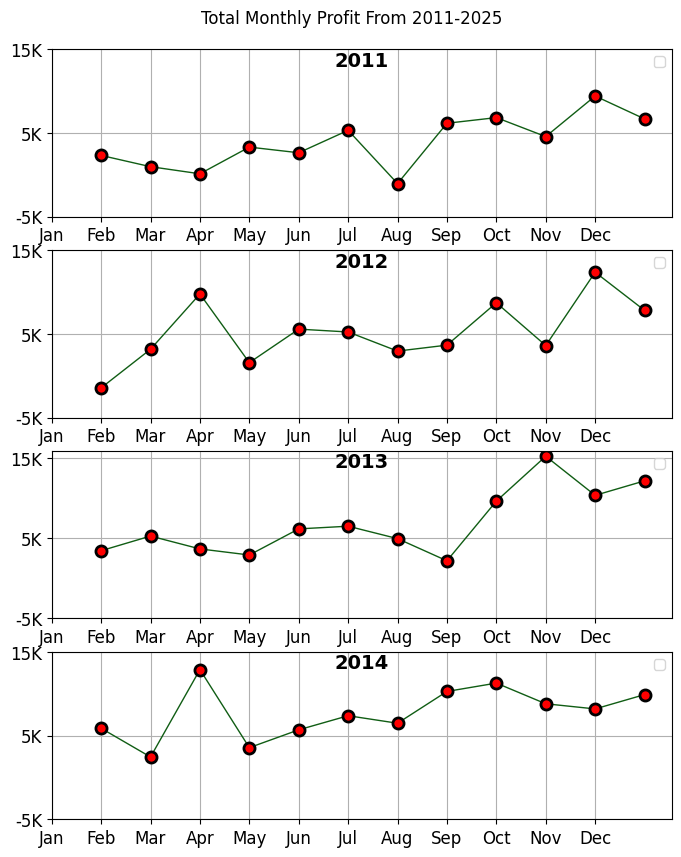

In [19]:
fontdict_title = {'fontsize': 18, 'fontweight': 'bold'}
fontdict_labels = {'fontsize': 14, 'fontweight': 'bold'}
fig, ax = plt.subplots(4, 1, figsize=(8, 10))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = [2011,2012,2013,2014]
years.sort()
fig.suptitle('Total Monthly Profit From 2011-2025', fontdict=fontdict_title, y=0.92)
for i, year in enumerate(years):
    df_year = df[df['Ship Year'] == year]
    monthly_sales = df_year.groupby('Ship Month').agg({'Profit':'sum'})
   # monthly_sales.index = month_names
    monthly_sales.plot(
                kind='line', 
                ax=ax[i], 
                color ="#105D14",
                lw = 1,
                marker='o', 
                markerfacecolor='red', 
                markeredgewidth=2, 
                markersize=8, 
                markeredgecolor='black',
                grid = 'True')
    ax[i].set_title(f'{year}', fontdict=fontdict_labels, pad = 0, y =0.90)
    #ax[i].set_ylabel('Profit ($)', rotation=0, labelpad=40, fontdict=fontdict_labels,)
    ax[i].set_xlabel('')
    ax[i].set_xticks(range(len(month_names)))
    ax[i].set_xticklabels(month_names, fontsize=12)
    # Set y-ticks with larger intervals and K format
    ax[i].set_yticks(range(-5000, 20001, 10000))
    ax[i].set_yticklabels([f'{x/1000:.0f}K' for x in ax[i].get_yticks()], fontsize=12)
    ax[i].legend('')
    
ax[2].set_yticks(range(-5000, 21000, 10000))
ax[2].set_yticklabels([f'{x/1000:.0f}K' for x in ax[2].get_yticks()], fontsize=12)

plt.show()

In [20]:
px.line(
    df.groupby(['Ship Year', 'Ship Month']).agg({'Profit':'sum'}).reset_index(),
    
    y='Profit',
    color='Ship Year',
    title='Monthly Profit Across All Segments',
    labels={'x':'Month', 'Profit':'Profit ($)'},
    markers=True,
    template='plotly_white',
    width=800,
    height=500
)

In [21]:
month_names.__len__()

12

<Axes: >

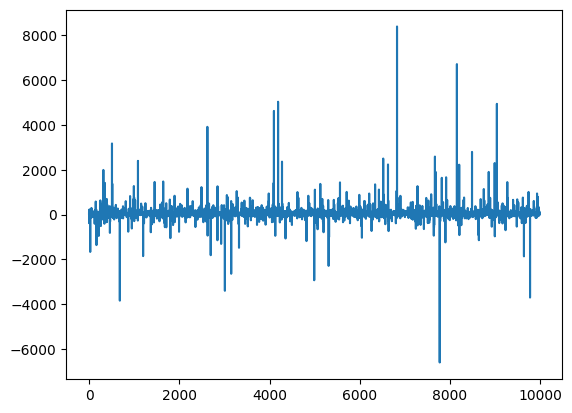

In [22]:
df['Profit'].plot(kind = 'line', x='Ship Date')

In [23]:
# Aggregate profits by date
daily_profits = df.groupby('Ship Date')['Profit'].sum().reset_index()

# Create an improved line plot
fig = px.line(daily_profits, 
              x='Ship Date', 
              y='Profit',
              title='Daily Total Profit Over Time',
              labels={'Ship Date': 'Date', 'Profit': 'Total Profit ($)'},
              template='plotly_white')

# Customize the layout
fig.update_layout(
    showlegend=False,
    xaxis_title="Date",
    yaxis_title="Total Profit ($)",
    hovermode='x unified'
)

fig.show()

<Axes: title={'center': 'Top 5 Brands'}>

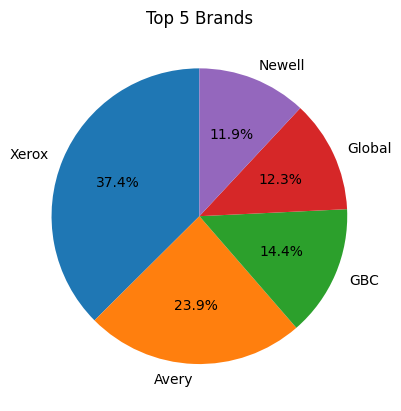

In [24]:
df['Product Name'].str.split().str[0].value_counts().head(5).plot(
    kind = 'pie',
    autopct='%1.1f%%',  
    startangle=90,
    ylabel='',
    title = 'Top 5 Brands',
)

<Axes: title={'center': 'Top 10 Product Brands'}, xlabel='Number of Sales', ylabel='Product Brand'>

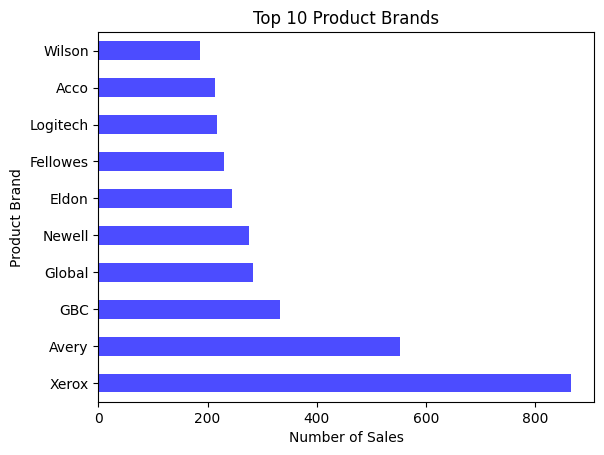

In [78]:
df['brand name'] = df['Product Name'].str.split().str[0]
df['brand name'] = df['brand name'][~df['brand name'].isin(['Staples', 'Office'])]
df['brand name'].value_counts().head(10).plot(
    kind = 'barh',
    title='Top 10 Product Brands',
    xlabel='Number of Sales',
    ylabel='Product Brand',
    color='blue',
   
    linewidth=1.2,
   
    alpha=0.7
)

<Axes: xlabel='brand name'>

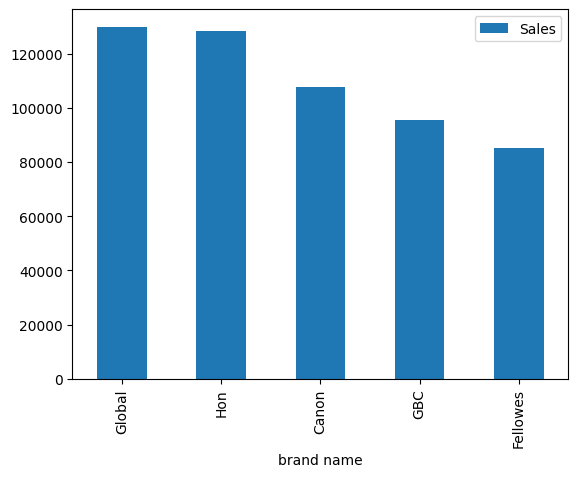

In [ ]:
df.groupby('brand name').agg({'Sales':'sum'}).sort_values(by='Sales', ascending=False).head(5).plot(
    kind = 'bar')

<Axes: title={'center': 'Top 5 Brands by Profit'}, xlabel='Total Profit ($)', ylabel='Brand Name'>

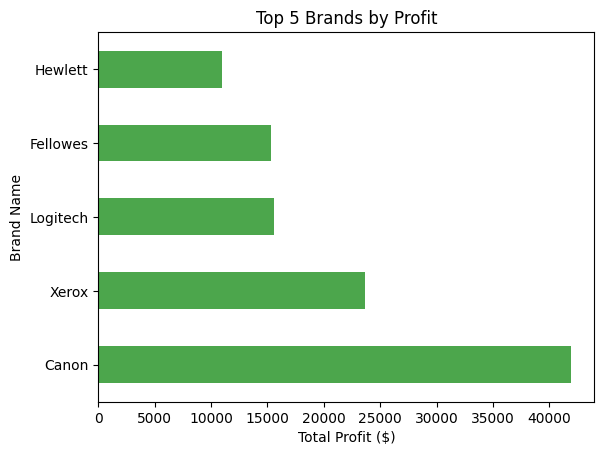

In [84]:
df.groupby('brand name').agg({'Profit':'sum'}).sort_values(by='Profit', ascending=False).head(5).plot(
    kind = 'barh',
    title='Top 5 Brands by Profit',
    xlabel='Total Profit ($)',
    ylabel='Brand Name',
    color='green',
    linewidth=1.2,
    alpha=0.7,
    legend=False
)

In [25]:
top5_brands = df['Product Name'].str.split().str[0].value_counts().head(5).index


In [26]:
df['Is Top 5 Brand'] = df['Product Name'].str.split().str[0].isin(top5_brands)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,...,Ship Year,Ship Month,Ship Day,Order Year,Order Month,Order Day,Price per Piece,Profit per Piece,Delivery Time,Is Top 5 Brand
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,...,2013,11,12,2013,11,9,130.9800,20.9568,3,False
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,...,2013,11,12,2013,11,9,243.9800,73.1940,3,False
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,...,2013,6,17,2013,6,13,7.3100,3.4357,4,False
3,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,...,2012,10,18,2012,10,11,191.5155,-76.6062,7,False
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,...,2012,10,18,2012,10,11,11.1840,1.2582,7,False


<Axes: ylabel='Profit'>

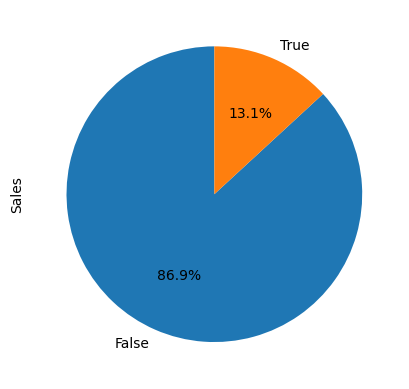

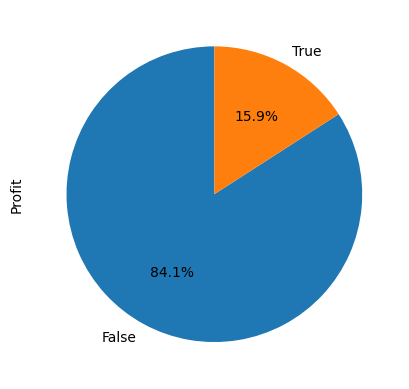

In [55]:
df.groupby('Is Top 5 Brand').agg({'Sales':'sum', 'Profit':'sum'})['Sales'].plot(
    kind = 'pie',
    autopct='%1.1f%%',
    startangle=90,  )
plt.figure()
df.groupby('Is Top 5 Brand').agg({'Sales':'sum', 'Profit':'sum'})['Profit'].plot(
    kind = 'pie',
    autopct='%1.1f%%',
    startangle=90,  )

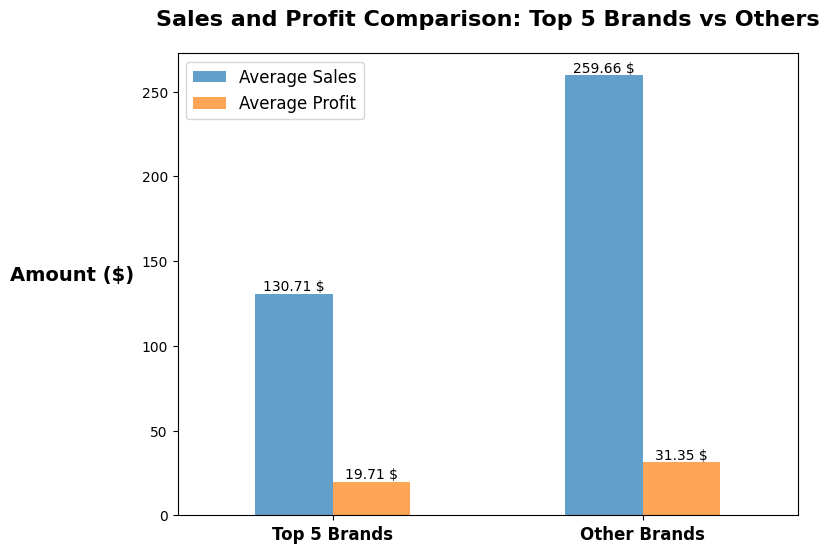

In [61]:
ax = df.groupby('Is Top 5 Brand').agg({'Sales':'mean', 'Profit':'mean'})\
                                 .reindex([True, False])\
                                 .plot(
    kind='bar',
    title='Sales and Profit Comparison: Top 5 Brands vs Others',
    xlabel='Is Top 5 Brand',
    ylabel='Amount ($)',
    rot=0,
    figsize=(8, 6),
    color=['#1f77b4', '#ff7f0e'],
   
    linewidth=1.5,
    grid=False,
    alpha=0.7
)
ax.set_title('Sales and Profit Comparison: Top 5 Brands vs Others', fontdict={'fontsize': 16, 'fontweight': 'bold'}, pad=20)
ax.set_ylabel('Amount ($)', fontdict={'fontsize': 14, 'fontweight': 'bold'}, labelpad=50, rotation=0)
ax.set_xlabel('')
ax.set_xticklabels(['Top 5 Brands', 'Other Brands'], fontsize=12, fontweight='bold')
ax.legend(['Average Sales', 'Average Profit'], fontsize=12) 
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f} $', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', 
                va='bottom', 
                fontsize=10)
#plt.grid(axis='y', alpha=0.4)
plt.show()


In [28]:
df['Is Top 5 Brand'].value_counts(normalize=True)

Is Top 5 Brand
False    0.768861
True     0.231139
Name: proportion, dtype: float64

In [29]:
df['Product Name'].str.split().str[0:2].value_counts().head(10)

Product Name
[Staples]                   227
[Wilson, Jones]             170
[Office, Star]               68
[Howard, Miller]             64
[GBC, DocuBind]              53
[Executive, Impressions]     51
[Avery, Durable]             48
[Wirebound, Message]         43
[Eldon, Expressions]         42
[Global, Leather]            39
Name: count, dtype: int64

In [30]:
# Extract first three words just in case
df["Product Name"].str.split().str[:3].str.join(" ").value_counts().head(10)

# Count uniq


Product Name
Staples                          227
Office Star -                     55
Wirebound Message Books,          34
Acco Pressboard Covers            33
Adams Telephone Message           29
Fellowes Bankers Box              27
Kingston Digital DataTraveler     25
BIC Brite Liner                   24
Atlantic Metals Mobile            24
Master Caster Door                23
Name: count, dtype: int64

In [31]:
df["Product Name"].str.split()

0                  [Bush, Somerset, Collection, Bookcase]
1       [Hon, Deluxe, Fabric, Upholstered, Stacking, C...
2       [Self-Adhesive, Address, Labels, for, Typewrit...
3       [Bretford, CR4500, Series, Slim, Rectangular, ...
4                   [Eldon, Fold, 'N, Roll, Cart, System]
                              ...                        
9989                          [Ultra, Door, Pull, Handle]
9990    [Tenex, B1-RE, Series, Chair, Mats, for, Low, ...
9991                           [Aastra, 57i, VoIP, phone]
9992    [It's, Hot, Message, Books, with, Stickers,, 2...
9993    [Acco, 7-Outlet, Masterpiece, Power, Center,, ...
Name: Product Name, Length: 9994, dtype: object

In [32]:
df[df['Product Name'].str.startswith('Xerox')]['Product Name']

12      Xerox 1967
56       Xerox 232
64      Xerox 1943
91      Xerox 1995
92      Xerox 1999
           ...    
9945    Xerox 1971
9953      Xerox 23
9957    Xerox 1882
9961    Xerox 1919
9975    Xerox 1977
Name: Product Name, Length: 865, dtype: object

<Axes: >

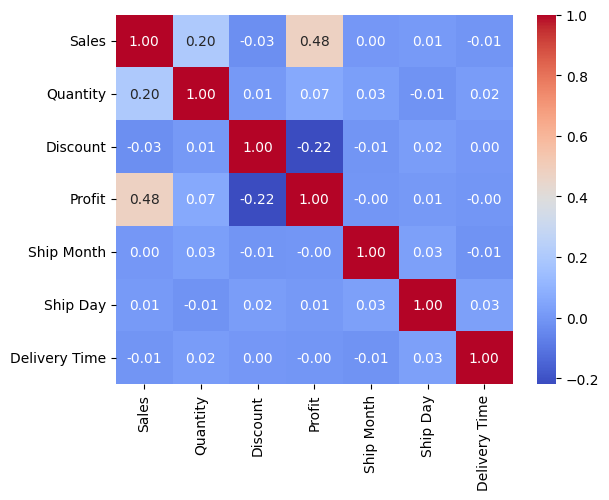

In [33]:
numerical_columns = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Ship Month', 'Ship Day', 'Delivery Time']]
corr = numerical_columns.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

In [34]:
df['Delivery Time'].describe()

count    9994.000000
mean        3.958875
std         1.747097
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Delivery Time, dtype: float64

In [35]:
df.groupby('State')['Delivery Time'].mean().sort_values().nsmallest(10)

State
North Dakota      2.857143
West Virginia     3.000000
Louisiana         3.047619
Rhode Island      3.285714
Ohio              3.452026
Nebraska          3.500000
South Carolina    3.595238
Connecticut       3.597561
Idaho             3.666667
Colorado          3.681319
Name: Delivery Time, dtype: float64

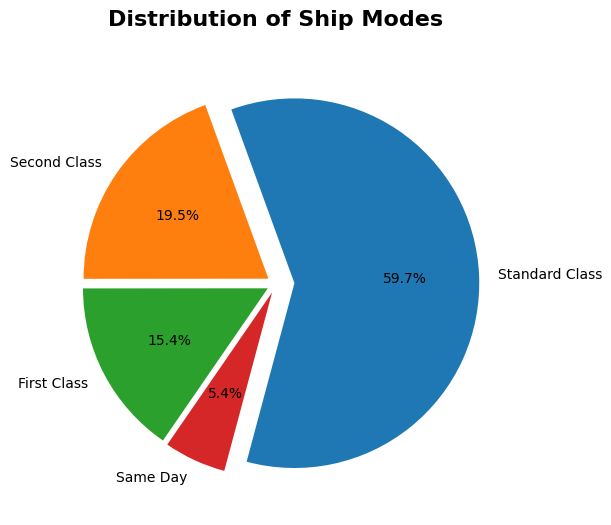

In [36]:
ax = df['Ship Mode'].value_counts().plot(
                                kind='pie', 
                                figsize=(8,6), 
                                autopct='%1.1f%%', 
                                startangle=-105, 
                                explode = (0.1, 0.05, 0.05, 0.05),
                                )

ax.set_ylabel('')
ax.set_title('Distribution of Ship Modes', fontdict={'fontsize': 16, 'fontweight': 'bold'}, pad=20)
plt.show()


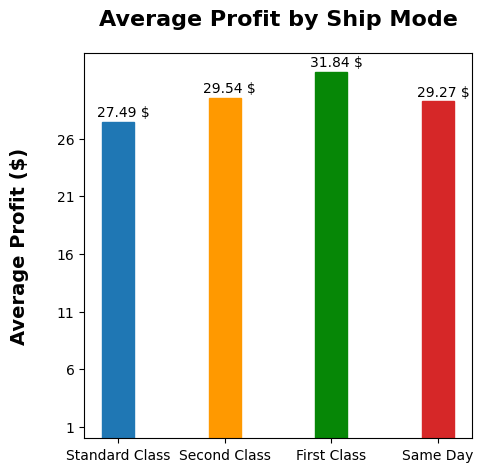

In [37]:

# Create the grouped data first
profit_by_mode = df.groupby('Ship Mode').agg({'Profit':'mean'}).reindex(
                        ['Standard Class', 'Second Class', 'First Class', 'Same Day'])

# Create the plot
fig, ax = plt.subplots(figsize=(5, 5))
bars = ax.bar(profit_by_mode.index, profit_by_mode['Profit'], width=0.3)

# Set individual colors for each bar
colors = ['#1f77b4', "#ff9900", "#068706", "#d62728"]  # Dark blue, Orange, Green, Red
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Customize the plot
ax.set_title('Average Profit by Ship Mode', pad=20, fontdict={'fontsize': 16, 'fontweight': 'bold'})
ax.set_ylabel('Average Profit ($)', labelpad=20, fontdict={'fontsize': 14, 'fontweight': 'bold'},
              )
ax.set_xlabel('')
ax.set_yticks(range(1, 30, 5))


for i, x in enumerate(profit_by_mode['Profit']):
    ax.text(i-0.2, x+0.8, f'{x:,.2f} $', va='center', fontsize=10)

plt.show()

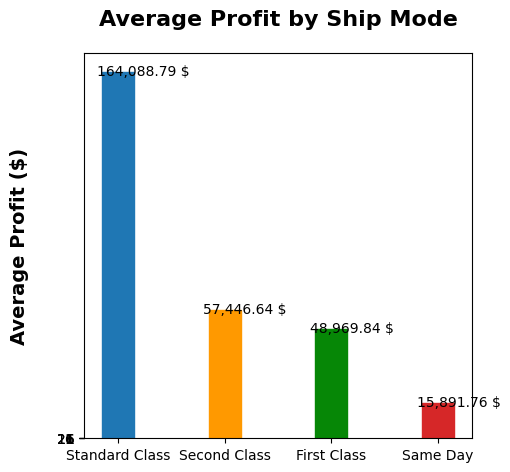

In [38]:

# Create the grouped data first
profit_by_mode = df.groupby('Ship Mode').agg({'Profit':'sum'}).reindex(
                        ['Standard Class', 'Second Class', 'First Class', 'Same Day'])

# Create the plot
fig, ax = plt.subplots(figsize=(5, 5))
bars = ax.bar(profit_by_mode.index, profit_by_mode['Profit'], width=0.3)

# Set individual colors for each bar
colors = ['#1f77b4', "#ff9900", "#068706", "#d62728"]  # Dark blue, Orange, Green, Red
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Customize the plot
ax.set_title('Average Profit by Ship Mode', pad=20, fontdict={'fontsize': 16, 'fontweight': 'bold'})
ax.set_ylabel('Average Profit ($)', labelpad=20, fontdict={'fontsize': 14, 'fontweight': 'bold'},
              )
ax.set_xlabel('')
ax.set_yticks(range(1, 30, 5))


for i, x in enumerate(profit_by_mode['Profit']):
    ax.text(i-0.2, x+0.8, f'{x:,.2f} $', va='center', fontsize=10)

plt.show()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\matplotlib\text.py:763: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\matplotlib\text.py:906: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



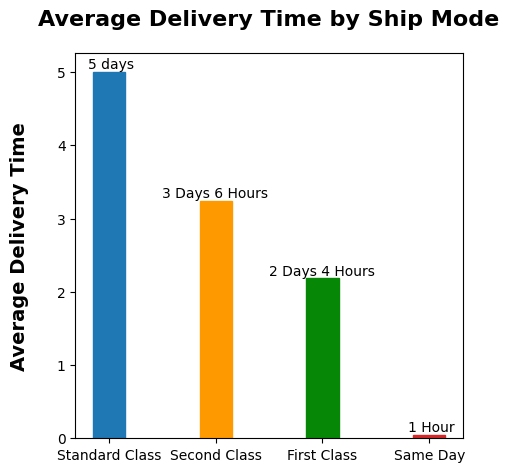

In [39]:

# Create the grouped data first
profit_by_mode = df.groupby('Ship Mode').agg({'Delivery Time':'mean'}).reindex(
                        ['Standard Class', 'Second Class', 'First Class', 'Same Day'])

# Create the plot
fig, ax = plt.subplots(figsize=(5, 5))
bars = ax.bar(profit_by_mode.index, profit_by_mode['Delivery Time'], width=0.3)

# Set individual colors for each bar
colors = ['#1f77b4', "#ff9900", "#068706", "#d62728"]  # Dark blue, Orange, Green, Red
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Customize the plot
ax.set_title('Average Delivery Time by Ship Mode', pad=20, fontdict={'fontsize': 16, 'fontweight': 'bold'})
ax.set_ylabel('Average Delivery Time', labelpad=20, fontdict={'fontsize': 14, 'fontweight': 'bold'},
              )
ax.set_xlabel('')
# ax.set_yticks(range(1, 30, 5))
import numpy as np
hours = (profit_by_mode['Delivery Time']-  profit_by_mode['Delivery Time'].astype(int))*24

# for i, x in enumerate(profit_by_mode['Delivery Time']):
#     if i==3:
#         continue
#     ax.text(i-0.2, x+0.1, f'{x:,.0f} Days' +' '+ f'{hours[i]:,.0f} Hours' 
#              if hours[i]>1 else f'{x:,.0f} Days'
#             , va='center', fontsize=10)
ax.text(-0.2, profit_by_mode.loc['Standard Class'] + 0.1,'5 days', va='center', fontsize=10)
ax.text(1-0.5, profit_by_mode.loc['Second Class'] + 0.1,'3 Days 6 Hours', va='center', fontsize=10)
ax.text(2-0.5, profit_by_mode.loc['First Class'] + 0.1,'2 Days 4 Hours', va='center', fontsize=10)
ax.text(3-0.2, profit_by_mode.loc['Same Day'] + 0.1,'1 Hour', va='center', fontsize=10)
plt.show()

In [50]:
profit_by_mode

,Delivery Time
Ship Mode,
Standard Class,5.007205
Second Class,3.240103
First Class,2.182055
Same Day,0.044199


<Axes: xlabel='Quantity'>

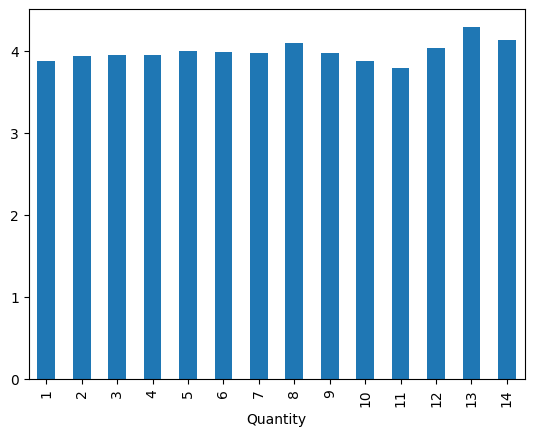

In [40]:
df.groupby('Quantity')['Delivery Time'].mean().plot(
    kind = 'bar',
    x = 'Quantity',
    y = 'Delivery Time'
)

In [41]:
profit_by_mode


,Delivery Time
Ship Mode,
Standard Class,5.007205
Second Class,3.240103
First Class,2.182055
Same Day,0.044199


In [42]:
profit_by_mode['Delivery Time']-  profit_by_mode['Delivery Time'].astype(int)

Ship Mode
Standard Class    0.007205
Second Class      0.240103
First Class       0.182055
Same Day          0.044199
Name: Delivery Time, dtype: float64

In [ ]:
# Create the map
cities = pd.read_csv("USZipsWithLatLon_20231227.csv", low_memory=False)
df_map = pd.merge(
    df,
    cities,
    left_on=["Postal Code"],
    right_on=["postal code"],
    how="inner"
)

df_map
df_city = (
    df_map.groupby(["Postal Code", "latitude", "longitude", "City", "State"])["Profit"]
    .mean()
)
df_city = df_city.reset_index()
fig = px.scatter_geo(  # Changed to scatter_geo instead of scatter_map
    df_city,
    lat="latitude",
    lon="longitude",
    color="Profit",
    size=abs(df_city["Profit"]),
    size_max=20,
    scope="usa",  # Set scope to USA specifically
    hover_name="Postal Code",
    hover_data={"latitude": False, "longitude": False, "City": True, "State": True, "Profit": ':.1f'},
    title="Average Profit by Location ($)",
    #color_continuous_scale="RdYlBu_r",
    color_continuous_scale=px.colors.sequential.Viridis,
)

fig.update_layout(
    geo=dict(
        showland=True,
        showcoastlines=True,
        showlakes=True,
        showcountries=True,
        showsubunits=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        lakecolor='rgb(255, 255, 255)',
        subunitcolor='rgb(217, 217, 217)'
    ),
    margin={"r":0,"t":30,"l":0,"b":0},
    height=800,
    width=1200
)

fig.show()

# Import credentials from config file
from config import CHART_STUDIO_USERNAME, CHART_STUDIO_API_KEY

# Set credentials
tools.set_credentials_file(username=CHART_STUDIO_USERNAME, api_key=CHART_STUDIO_API_KEY)
    
# Upload to Chart Studio
plot_url = py.plot(fig, filename='profit by city', sharing='public')
print('Your shareable plot URL:', plot_url)

Your shareable plot URL: https://chart-studio.plotly.com/~manipuppeteer/24/


In [119]:
# Create the map
cities = pd.read_csv("USZipsWithLatLon_20231227.csv", low_memory=False)
df_map = pd.merge(
    df,
    cities,
    left_on=["Postal Code"],
    right_on=["postal code"],
    how="inner"
)

df_map
df_city = (
    df_map.groupby(["Postal Code", "latitude", "longitude", "City", "State"])["Delivery Time"]
    .mean()
)
df_city = df_city.reset_index()
fig = px.scatter_geo(  # Changed to scatter_geo instead of scatter_map
    df_city,
    lat="latitude",
    lon="longitude",
    color="Delivery Time",
    size=abs(df_city["Delivery Time"]),
    size_max=20,
    scope="usa",  # Set scope to USA specifically
    hover_name="Postal Code",
    hover_data={"latitude": False, "longitude": False, "City": True, "State": True, "Delivery Time": ':.1f'},
    title="Average Delivery Time by Location ($)",
    #color_continuous_scale="RdYlBu_r",
    color_continuous_scale=px.colors.sequential.Viridis,
)

fig.update_layout(
    geo=dict(
        showland=True,
        showcoastlines=True,
        showlakes=True,
        showcountries=True,
        showsubunits=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        lakecolor='rgb(255, 255, 255)',
        subunitcolor='rgb(217, 217, 217)'
    ),
    margin={"r":0,"t":30,"l":0,"b":0},
    height=800,
    width=1200
)

fig.show()
tools.set_credentials_file(username='manipuppeteer', api_key='2gBBLjnre4aKY0G5kZwd')
    
    # Upload to Chart Studio
plot_url = py.plot(fig, filename='profit by city', sharing='public')
print('Your shareable plot URL:', plot_url)


Your shareable plot URL: https://chart-studio.plotly.com/~manipuppeteer/24/


In [92]:
df_city.reset_index()

,Postal Code,latitude,longitude,City,State,Profit
0,1040,42.2020,-72.6262,Holyoke,Massachusetts,60.392000
1,1453,42.5274,-71.7563,Leominster,Massachusetts,13.250267
2,1752,42.3509,-71.5434,Marlborough,Massachusetts,33.803400
3,1810,42.6496,-71.1565,Andover,Massachusetts,31.047150
4,1841,42.7115,-71.1670,Lawrence,Massachusetts,56.042530
...,...,...,...,...,...,...
627,98502,47.1043,-123.0552,Olympia,Washington,27.925380
628,98632,46.1514,-122.9634,Longview,Washington,12.966100
629,98661,45.6418,-122.6251,Vancouver,Washington,15.090920
630,99207,47.6977,-117.3746,Spokane,Washington,24.603729


In [ ]:
# Aggregate data by state
from config import CHART_STUDIO_USERNAME, CHART_STUDIO_API_KEY

def plot_choropleth_map(data, col):
   
    df_state = df.groupby('State').agg({col:'mean'}).reset_index()

    # Print state names to check format
    print("States in our data:")
    print(df_state['State'].sort_values().tolist())

    # Create a dictionary for state abbreviations
    state_abbrev = {
        'Alabama': 'AL', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
        'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL',
        'Georgia': 'GA', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN',
        'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
        'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
        'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
        'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
        'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
        'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
        'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
        'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
        'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
        'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
    }

    # Map state names to abbreviations
    df_state['State_Code'] = df_state['State'].map(state_abbrev)

    # Create the choropleth map
    fig = px.choropleth(
        df_state,
        locations='State_Code',     # Now using state codes
        locationmode='USA-states',  # Built-in state codes for USA
        color=col,      # Values to show in color
        scope="usa",               # Focus on USA map
        color_continuous_scale="RdYlBu_r",  # Red for higher values, blue for lower
        title=f"Average {col} by State ",
        labels={col: f'Average {col}'},
        hover_data={"State": True, col: ':.1f'},
    )

    # Update the layout
    fig.update_layout(
        geo=dict(
            showlakes=True,
            lakecolor='rgb(255, 255, 255)',
            showcountries=True,
            showsubunits=True,
            subunitcolor="black",
            scope='usa',
            projection_scale=1.2  # Adjust this value to zoom in/out
        ),
        margin={"r":0,"t":30,"l":0,"b":0},
        height=800,
        width=1200
    )

    # Save locally
    local_filename = f"choropleth_map_{col.replace(' ', '_').lower()}.html"
    fig.write_html(local_filename)
    
    try:
        # Set credentials
        tools.set_credentials_file(username=CHART_STUDIO_USERNAME, api_key=CHART_STUDIO_API_KEY)
        
        # Create a unique filename for Chart Studio based on the metric
        chart_studio_filename = f'choropleth_{col.replace(" ", "_").lower()}_by_state'
        
        # Upload to Chart Studio with unique filename
        plot_url = py.plot(fig, filename=chart_studio_filename, sharing='public')
        print(f'Your shareable {col} plot URL:', plot_url)
        
    except Exception as e:
        print(f'Error uploading to Chart Studio: {str(e)}')
        print(f'Plot has been saved locally as {local_filename}')

    # Show the plot
    fig.show()

    # Print any states that didn't get mapped (for debugging)
    unmapped_states = df_state[df_state['State_Code'].isna()]['State'].tolist()
    if unmapped_states:
        print("\nStates that couldn't be mapped:")
        print(unmapped_states)

# Create and share the Delivery Time plot
plot_choropleth_map(df, 'Delivery Time')

States in our data:
['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
Your shareable Delivery Time plot URL: https://chart-studio.plotly.com/~manipuppeteer/20/
Your shareable Delivery Time plot URL: https://chart-studio.plotly.com/~manipuppeteer/20/



States that couldn't be mapped:
['District of Columbia']


In [103]:
plot_choropleth_map(df, 'Profit')

States in our data:
['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
Your shareable Profit plot URL: https://chart-studio.plotly.com/~manipuppeteer/22/
Your shareable Profit plot URL: https://chart-studio.plotly.com/~manipuppeteer/22/



States that couldn't be mapped:
['District of Columbia']


In [101]:
plot_choropleth_map(df, 'Sales')

States in our data:
['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


Your shareable plot URL: https://chart-studio.plotly.com/~manipuppeteer/5/

States that couldn't be mapped:
['District of Columbia']


In [ ]:
# First make sure we have the required packages
import chart_studio.plotly as py
from chart_studio import tools
from config import CHART_STUDIO_USERNAME, CHART_STUDIO_API_KEY

# Create the plot
no_of_orders = df.groupby('Customer ID')['Order ID'].count().sort_values(ascending=False)
days_since_last_order = (pd.to_datetime('2015-02-01') - df.groupby('Customer ID')['Order Date'].max()).dt.days
total_spent = df.groupby('Customer ID')['Sales'].sum()
customer_df = pd.DataFrame({'No of Orders': no_of_orders, 'Days Since Last Order': days_since_last_order, 'Total Spent': total_spent}).reset_index()
fig = px.scatter(customer_df,
    x='Total Spent',
    y='Days Since Last Order',
    color='No of Orders',
    labels={'x':'Total Spent ($)', 'y':'Days Since Last Order', 'color':'No of Orders'},
    title='Identifying the most valued Customers',
    
    template='plotly_white',
    hover_data=['Customer ID'],
    color_continuous_scale='OrRd',
    width=800,
    height=500
)

# Update x-axis to logarithmic scale
fig.update_xaxes(type="log")

# Update layout
fig.update_layout(
    title_x=0.5,
    title_font_size=20,
    hoverlabel=dict(bgcolor="white"),
    xaxis_title="Total Spent ($) - Log Scale"
)

try:
    # Save locally as HTML first
    fig.write_html("most_valued_customers.html")
    
    # Set credentials
    tools.set_credentials_file(username=CHART_STUDIO_USERNAME, api_key=CHART_STUDIO_API_KEY)
    
    # Upload to Chart Studio
    plot_url = py.plot(fig, filename='most_valued_customers', sharing='public')
    print('Your shareable plot URL:', plot_url)
    print('This link can be shared with anyone to view the plot!')
except Exception as e:
    print(f'Error uploading to Chart Studio: {str(e)}')
    print('Plot has been saved locally as most_valued_customers.html')
    
# Display the plot in notebook
fig.show()

Your shareable plot URL: https://chart-studio.plotly.com/~manipuppeteer/3/
This link can be shared with anyone to view the plot!


In [ ]:
df.groupby('Order ID')['Product Name'].count().nlargest(10)

Order ID
CA-2014-100111    14
CA-2014-157987    12
CA-2013-165330    11
US-2013-108504    11
CA-2012-131338    10
CA-2013-105732    10
US-2012-126977    10
CA-2011-106439     9
CA-2012-104346     9
CA-2012-132626     9
Name: Product Name, dtype: int64

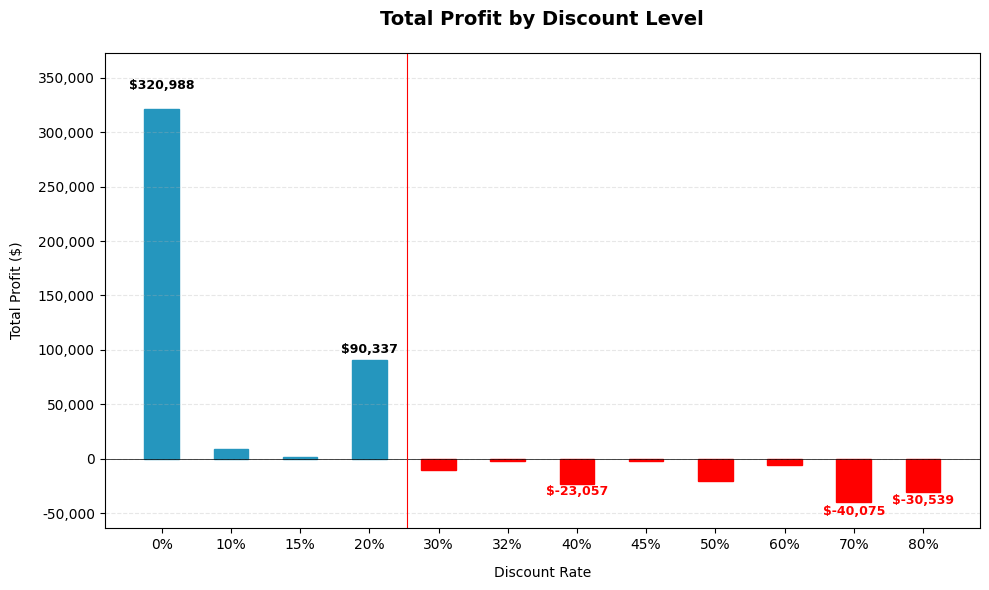


Summary of Profits by Discount Level:
    Discount       Profit
0       0.00  320987.6032
1       0.10    9029.1770
2       0.15    1418.9915
3       0.20   90337.3060
4       0.30  -10369.2774
5       0.32   -2391.1377
6       0.40  -23057.0504
7       0.45   -2493.1111
8       0.50  -20506.4281
9       0.60   -5944.6552
10      0.70  -40075.3569
11      0.80  -30539.0392


In [ ]:
# Group by Discount and calculate total Profit
profit_by_discount = df.groupby('Discount')['Profit'].sum().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))

# Create bars and color them based on profit/loss
bars = plt.bar(range(len(profit_by_discount)), profit_by_discount['Profit'], width=0.5)
for bar, profit in zip(bars, profit_by_discount['Profit']):
    bar.set_color('red' if profit < 0 else '#2596be')

# Add title and labels
plt.title('Total Profit by Discount Level', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Discount Rate', labelpad=10)
plt.ylabel('Total Profit ($)', labelpad=10)

# Add gridlines
plt.grid(True, axis='y', linestyle='--', alpha=0.3)

# Add value labels on top of each bar
for i, profit in enumerate(profit_by_discount['Profit']):
    color = 'red' if profit < 0 else 'black'
    # Calculate vertical offset based on whether profit is positive or negative
    y_offset = 1 if profit >= 0 else -1
    # Position the text above positive bars and below negative bars
    if abs(profit) > 21000:
        plt.text(i,  # Center the text on the bar
                profit + (y_offset * abs(profit) * 0.05),  # Offset by 5% of the profit value
                f'${profit:,.0f}',
                ha='center',  # Horizontal center alignment
                va='bottom' if profit >= 0 else 'top',
                color=color,
                fontsize=9,
                fontweight='bold')

# Add a horizontal line at y=0 to clearly show profit/loss boundary
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.axvline(x=3.55, color='red', linestyle='-', linewidth=0.8)
# Format x-axis to show percentages
plt.xticks(range(len(profit_by_discount)), 
           [f'{x:.0%}' for x in profit_by_discount['Discount']], 
           rotation=0)

# Format y-axis with comma separator for thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Add some padding to the y-axis limits to prevent text cutoff
ymin, ymax = plt.ylim()
plt.ylim(ymin * 1.1, ymax * 1.1)  # Add 10% padding

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print summary statistics
print("\nSummary of Profits by Discount Level:")
print(profit_by_discount.sort_values('Discount'))

In [ ]:
profit_by_discount

,Discount,Profit
0,0.00,320987.6032
1,0.10,9029.1770
2,0.15,1418.9915
3,0.20,90337.3060
4,0.30,-10369.2774
5,0.32,-2391.1377
6,0.40,-23057.0504
7,0.45,-2493.1111
8,0.50,-20506.4281
9,0.60,-5944.6552


In [ ]:
ax = profit_discount.plot(kind= 'bar',
                    x='Discount',
                    y='Profit')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend('')


NameError: name 'profit_discount' is not defined

In [ ]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,...,Ship Year,Ship Month,Ship Day,Order Year,Order Month,Order Day,Price per Piece,Profit per Piece,Delivery Time,Is Top 5 Brand
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,...,2013,11,12,2013,11,9,130.9800,20.9568,3,False
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,...,2013,11,12,2013,11,9,243.9800,73.1940,3,False
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,...,2013,6,17,2013,6,13,7.3100,3.4357,4,False
3,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,...,2012,10,18,2012,10,11,191.5155,-76.6062,7,False
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,...,2012,10,18,2012,10,11,11.1840,1.2582,7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2011-110422,2011-01-22,2011-01-24,Second Class,TB-21400,Consumer,Miami,Florida,33180,South,...,2011,1,24,2011,1,22,8.4160,1.3676,2,False
9990,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,...,2014,3,4,2014,2,27,45.9800,7.8166,5,False
9991,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,...,2014,3,4,2014,2,27,129.2880,9.6966,5,False
9992,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,...,2014,3,4,2014,2,27,7.4000,3.3300,5,False


<Axes: xlabel='Discount'>

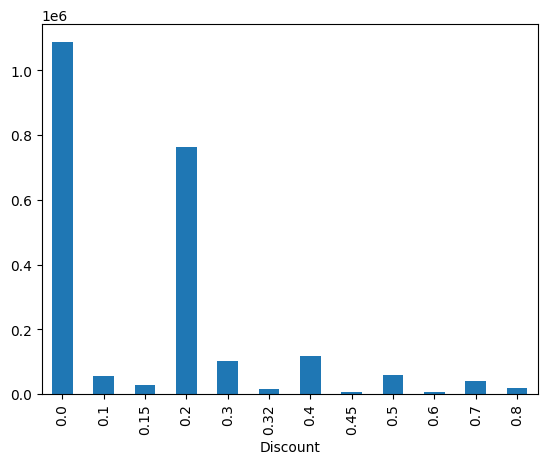

In [ ]:
df.groupby('Discount')['Sales'].sum().plot(kind='bar')

In [106]:
df['Delivery Day'] = df['Ship Date'].dt.day_name()
df['Delivery Day'].value_counts()

Delivery Day
Saturday     1617
Tuesday      1539
Sunday       1527
Monday       1496
Wednesday    1385
Friday       1296
Thursday     1134
Name: count, dtype: int64

In [107]:
ship_day = df['Delivery Day']
order_day = df['Order Date'].dt.day_name()
order_day.value_counts()

Order Date
Friday       1837
Monday       1812
Thursday     1805
Tuesday      1780
Wednesday    1601
Saturday      970
Sunday        189
Name: count, dtype: int64

<Axes: ylabel='count'>

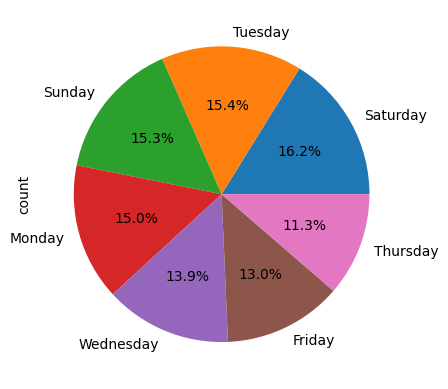

In [115]:
ship_day.value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='count'>

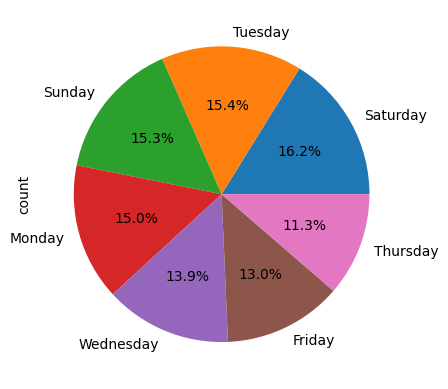

In [116]:
ship_day.index = order_day.index
ship_day.value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: title={'center': 'Maximale Kosten nach Versandart'}, xlabel='Ship Mode', ylabel='Kosten'>

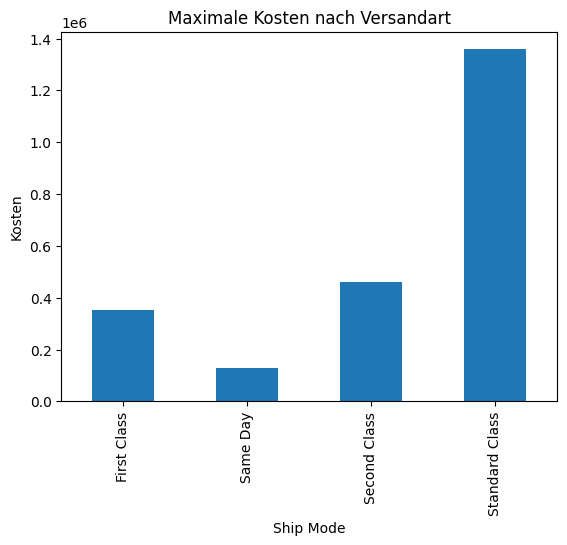

In [128]:
df['Kosten'] = df['Sales'] - df['Profit']
df.groupby('Ship Mode')['Sales'].sum().plot(kind='bar', title='Maximale Kosten nach Versandart', ylabel='Kosten')